# NutriClass: Food Classification Using Nutritional Data



# DATA LOADING

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\nivia\Downloads\synthetic_food_dataset_imbalanced.csv")
df.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


# DATASET OVERVIEW

In [8]:
 # i) DATASET SIZE (ROWS & COLUMNS)

In [9]:
df.shape

(31700, 16)

In [10]:
# ii) COLUMN NAMES

In [11]:
df.columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')

In [12]:
# iii) DATASET INFORMATION 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

# DATAPREPROCESSING - LABLE CREATION

In [14]:
# i) LABLE RULES DEFINE

In [15]:
def classify_food(row):
    if row['Calories'] > 300 and row['Sugar'] > 10:
        return 'Unhealthy'
    else:
        return 'Healthy'

In [16]:
# ii) NEW COLUMN CREATE

In [17]:
df['Food_Class'] = df.apply(classify_food, axis=1)

In [18]:
# iii) RESULTS

In [19]:
df[['Calories', 'Sugar', 'Food_Class']].head()

,Calories,Sugar,Food_Class
0,290.463673,4.828030,Healthy
1,212.626748,16.347814,Healthy
2,330.695408,6.251137,Healthy
3,198.070798,2.984621,Healthy
4,274.496228,17.352958,Healthy


In [20]:
# iv) CLASS COUNT (IMBALANCE CHECK)

In [21]:
df['Food_Class'].value_counts()

Food_Class
Healthy      31163
Unhealthy      537
Name: count, dtype: int64

# FEATURE SELECTION & TRAIN-TEST SPLIT

In [22]:
# i) FEATURE & TARGET SEPERATE

In [23]:
X = df.drop('Food_Class', axis=1)
y = df['Food_Class']

In [24]:
# ii) TRAIN-TEST SPLIT

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# iii) SHAPE CHECK

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25360, 16)
(6340, 16)
(25360,)
(6340,)


# FEATURE SCALING (STANDARDIZATION)

In [34]:
X_train.dtypes

Calories              float64
Protein               float64
Fat                   float64
Carbs                 float64
Sugar                 float64
Fiber                 float64
Sodium                float64
Cholesterol           float64
Glycemic_Index        float64
Water_Content         float64
Serving_Size          float64
Meal_Type              object
Preparation_Method     object
Is_Vegan                 bool
Is_Gluten_Free           bool
Food_Name              object
dtype: object

In [35]:
 # FOOD NAME DROP
X_train = X_train.drop(columns=['Food_Name'])
X_test  = X_test.drop(columns=['Food_Name'])

In [36]:
# BOOLEAN INT CONVERT 
X_train['Is_Vegan'] = X_train['Is_Vegan'].astype(int)
X_train['Is_Gluten_Free'] = X_train['Is_Gluten_Free'].astype(int)

X_test['Is_Vegan'] = X_test['Is_Vegan'].astype(int)
X_test['Is_Gluten_Free'] = X_test['Is_Gluten_Free'].astype(int)

In [37]:
# OBJECT COLUMNS ENCODE (LABLE ENCODING)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Meal_Type', 'Preparation_Method']:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])

In [38]:
X_train.dtypes

Calories              float64
Protein               float64
Fat                   float64
Carbs                 float64
Sugar                 float64
Fiber                 float64
Sodium                float64
Cholesterol           float64
Glycemic_Index        float64
Water_Content         float64
Serving_Size          float64
Meal_Type               int64
Preparation_Method      int64
Is_Vegan                int64
Is_Gluten_Free          int64
dtype: object

In [28]:
# i) STANDARDSCALER IMPORT

In [39]:
from sklearn.preprocessing import StandardScaler

In [30]:
# ii) SCALER CREATE

In [40]:
scaler = StandardScaler()

In [32]:
# iii) TRAIN DATA SCALE

In [41]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [42]:
# iv) TEST DATA SCALE

In [43]:
X_test_scaled = scaler.transform(X_test)

In [44]:
X_train_scaled[:5]

array([[-0.75039898,  0.31153815, -0.69568687, -0.24977559, -0.45943198,
         0.24478209, -0.0370575 , -0.61759668,  0.28547712,  0.09697383,
        -0.10130174, -0.44408041, -1.33720822, -0.36351459,  1.26289522],
       [ 0.84646732,  1.7442235 ,  1.01484641, -2.28283051, -1.0695538 ,
        -1.07127051, -0.76010448,  2.19819688, -2.49649989,  0.16238638,
         0.88938954,  1.34252691, -0.44784026, -0.36351459,  1.26289522],
       [-0.03510156,  0.11608919, -0.0265611 ,  0.42303415, -0.57439808,
        -0.29662347,  0.94385335, -0.02452795,  0.55725656, -0.68072052,
         0.61343123,  1.34252691, -0.44784026, -0.36351459, -0.79183133],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan, -0.44408041,  1.33089568, -0.36351459, -0.79183133],
       [-0.45069235,  0.21803201, -0.54292529, -0.32626417, -0.78562174,
        -0.95793642,  0.03013476,  0.02848455, 

# MODEL TRAINING (LOGISTIC REGRESSION)

In [51]:
X_train_num = X_train.select_dtypes(include=['float64', 'int64', 'bool'])
X_test_num  = X_test.select_dtypes(include=['float64', 'int64', 'bool'])

In [52]:
X_train_num = X_train_num.fillna(X_train_num.mean())
X_test_num  = X_test_num.fillna(X_test_num.mean())

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled  = scaler.transform(X_test_num)

In [45]:
# i) LOGISTIC REGRESSION IMPORT

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
# ii) MODEL CREATE

In [60]:
model = LogisticRegression(max_iter=1000)

In [61]:
# iii) MODEL TRAIN

In [62]:
model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

# MODEL PREDICTION

In [63]:
# i) PREDICTION

In [64]:
y_pred = model.predict(X_test_scaled)

In [65]:
# ii) ACCURACY CHEACK

In [66]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9930599369085173

In [67]:
# iii) CLASSIFICATION REPORT

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       0.99      1.00      1.00      6227
   Unhealthy       0.92      0.67      0.78       113

    accuracy                           0.99      6340
   macro avg       0.95      0.84      0.89      6340
weighted avg       0.99      0.99      0.99      6340



# CONFUSION MATRIX

In [69]:
# i) CONFUSTION MATRIX IMPORT

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
# ii) CONFUSTION MATRIX CREATE

In [72]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6220,    7],
       [  37,   76]])

In [73]:
# iii) CONFUSTION MATRIX VISUALIZE

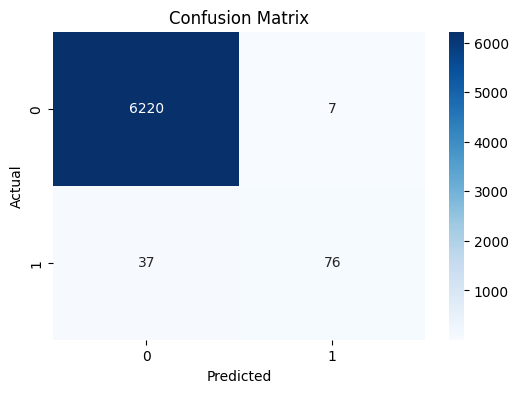

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# RESULT & ACCURACY

In [75]:
# i) ACCURACY & CLASSIFICATION

In [76]:
from sklearn.metrics import accuracy_score, classification_report

In [77]:
# ii) ACCURACY CALCULATION

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

In [79]:
# iii) CLASSIFICATION REPORT

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       0.99      1.00      1.00      6227
   Unhealthy       0.92      0.67      0.78       113

    accuracy                           0.99      6340
   macro avg       0.95      0.84      0.89      6340
weighted avg       0.99      0.99      0.99      6340



# MODEL SAVE

In [81]:
# i) JOBLIB IMPORT

In [82]:
import joblib

In [83]:
# ii) MODEL SAVE

In [84]:
joblib.dump(model, "nutrition_model.pkl")

['nutrition_model.pkl']